# **FINAL PROJECT GROUP 6**

Skema 1

Contributor:
1. Andreean Dharma Arisandi
2. Reynaldi Marchiano
3. Sanggeni Gali Whardana
4. Teza Marlevi Fajar

# **IMPORTING LIBRARY**


Pada Bagian ini kita akan melakukan importing library yang dibutuh kan dalam pembuatan model

In [ ]:
!pip install pysastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 9.1 MB/s 


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import gensim

from nltk import tokenize
from nltk.cluster.util import cosine_distance
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from gensim.models import Word2Vec

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **DATA LOADING**

In [ ]:
# Loading dataset
data = pd.read_csv('https://raw.githubusercontent.com/H8-Assignments-Bay/p2---final-project-group-006/main/Dataset_final_project_grup6.csv')

In [ ]:
data.head()

,No,Nama Restaurant,Rating,Price,Daerah,Tipe_1,Tipe_2,Tipe_3,Review
0,1,KAKAW Fine Chocolate & Patisserie,3.4,20000,"Senayan, Jakarta",Kafe,Desserts,-,[('Fine Chocolate & Pattiserie ini tempatnya t...
1,2,Join Kopi Bulungan,3.9,20000,"Blok M, Jakarta",Kopi,-,-,[('Kopinya enak. Kental dan terasa kopinya. Ad...
2,3,Kopi Coga,4.0,25000,"Bendungan Hilir, Jakarta",Kafe,Kopi,Tea,[('Tempatnya mungil dengan nuansa berwarna bir...
3,4,"Mie Keriting Benhil ""Mas Pujo""",3.4,25000,"Bendungan Hilir, Jakarta",Bakmi,-,-,[('mie yamin manis special enak sih lebih enak...
4,5,Rocky Rooster,4.2,25000,"Palmerah, Jakarta",Makanan Cepat Saji,-,-,[('Kulitnya Enak Crispy Trs Dagingnya Juicy Bu...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               120 non-null    int64  
 1   Nama Restaurant  120 non-null    object 
 2   Rating           120 non-null    float64
 3   Price            120 non-null    int64  
 4   Daerah           120 non-null    object 
 5   Tipe_1           120 non-null    object 
 6   Tipe_2           120 non-null    object 
 7   Tipe_3           120 non-null    object 
 8   Review           120 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 8.6+ KB


In [ ]:
data.drop('No', axis=1, inplace=True)

# **EXPLORATORY DATA ANALYSIS**

Pada bagian ini kita akan melakukan exploratiry data analysis terhadap dataset yang kita punya

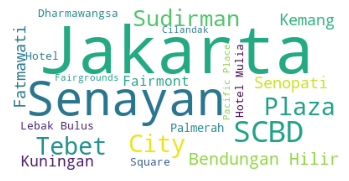

In [ ]:
corpus = " ".join(data['Daerah'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)
img = word_cloud.to_image()

fig = plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.show()

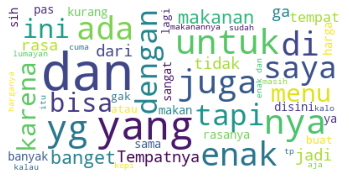

In [ ]:
corpus = " ".join(data['Review'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)
img = word_cloud.to_image()

fig = plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.show()

# **DATA PREPROCESSING**

Pada bagian ini kita akan melakukan text preprocessing

Melakukan text preprocessing bahasa indonesia mempunyai kesulitan tersindiri, yang dimana kita harus bisa melakukan preprocessing kata-kata yang tidak umum, atau slang. Disini saya mempunyai 2 kamus formalize, yang dimana ada Colloquial Indonesian Lexicon dari paper publikasi bernama Nikmatun Aliyah Salsabila dan ada file Formalize yang saya buat sendiri setelah menemukan kata kata yang tidak umum.


Berikut adalah link dari Colloquial Indonesian Lexicon
https://ieeexplore.ieee.org/abstract/document/8629151

loading 2 kamus

In [ ]:
lexicon = pd.read_csv('https://raw.githubusercontent.com/H8-Assignments-Bay/p2---final-project-group-006/main/Text%20Preprocessing/colloquial-indonesian-lexicon.csv')
formalize = pd.read_csv('https://raw.githubusercontent.com/H8-Assignments-Bay/p2---final-project-group-006/main/Text%20Preprocessing/formalize_word.csv')

In [ ]:
# Display Lexicon
lexicon

,slang,formal,In-dictionary,context,category1,category2,category3
0,woww,wow,1,wow,elongasi,0,0
1,aminn,amin,1,Selamat ulang tahun kakak tulus semoga panjang...,elongasi,0,0
2,met,selamat,1,Met hari netaas kak!? Wish you all the best @t...,abreviasi,0,0
3,netaas,menetas,1,Met hari netaas kak!? Wish you all the best @t...,afiksasi,elongasi,0
4,keberpa,keberapa,0,Birthday yg keberpa kak?,abreviasi,0,0
...,...,...,...,...,...,...,...
15001,gataunya,tidak taunya,0,Ini kaya nenek2 ya beb gataunya agnezz @yugime...,akronim,0,0
15002,gtau,tidak tau,0,Stidaknya mrka may berkarya Dan berusaha yg tr...,akronim,abreviasi,0
15003,gatau,tidak tau,0,Ih gatau malu,akronim,0,0
15004,fans2,fan-fan,0,Jkt48 adalah tempat di mana sesama fans saling...,reduplikasi,naturalisasi,0


In [ ]:
# Display Formalize
formalize

,Slang,Formal
0,bgs,bagus
1,jg,juga
2,Hy,hai
3,dlm,dalam
4,Mgkn,mungkin
5,krn,karena
6,hr,hari
7,dgn,dengan
8,utk,untuk
9,kek,seperti


In [ ]:
# Melihat 10 data awal lexicon
dict_lexicon = pd.Series(lexicon.formal.values,index=lexicon.slang).to_dict()
dict_lexicon['brg'] = 'barang'
dict_lexicon['kw']='tiruan'
dict(list(dict_lexicon.items())[:10])

{'aminn': 'amin',
 'eeeehhhh': 'eh',
 'hallo': 'halo',
 'ka': 'kak',
 'kaka': 'kakak',
 'kata2nyaaa': 'kata-katanya',
 'keberpa': 'keberapa',
 'met': 'selamat',
 'netaas': 'menetas',
 'woww': 'wow'}

In [ ]:
# Melihat 10 data awal
dict_formalize = pd.Series(formalize.Formal.values,index=formalize.Slang).to_dict()
dict(list(dict_formalize.items())[:10])

{'Hy': 'hai',
 'Mgkn': 'mungkin',
 'bgs': 'bagus',
 'dgn': 'dengan',
 'dlm': 'dalam',
 'hr': 'hari',
 'jg': 'juga',
 'kek': 'seperti',
 'krn': 'karena',
 'utk': 'untuk'}

Selanjutnya kita akan membuat function untuk melakukan text preprocessing terhadap kolom review

In [ ]:
def clean_text(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"    
        u"\U0001F300-\U0001F5FF"    
        u"\U0001F680-\U0001F6FF"   
        u"\U0001F1E0-\U0001F1FF"    
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"                   
        u"\u3030"
                      "]+", re.UNICODE)

    text = text.lower()                                                                                 # membuat huruf menjadi kecil
    text = re.sub(emoj, '', text)                                                                       # remove emoji
    text = re.sub(r'(.)\1{2,}', r'\1', text)                                                            # mengubah huruf berulang diatas 2 kali menjadi 1 saja
    text = re.sub("[0-9]", " ", text)                                                                   # remove numbers
    text = re.sub("(Diterjemahkan oleh Google)", " ", text)                                                                   
    text = re.sub("'s", " ", text) 
    text = re.sub("[¹²³¹⁰ⁱ⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾ⁿ]", "", text)                                                     # remove power character
    text = re.sub("[^A-Za-z\s']"," ", text)  
    text = re.sub("[^\w\s]*[_,.!?#&;:><+-/)/(\'\"]", " ", text)                                         # remove bukan string dan whitespace
    text = ' '.join([re.sub(r'nya$|ny$', '', i) for i in text.split()])                                 # menghapus akhir kata 'nya' atau 'ny'
    text = " ".join(dict_lexicon[w] if w in dict_lexicon else w for w in text.split())                  # replace sesuai dict_lexicon
    text = " ".join(dict_formalize[w] if w in dict_formalize else w for w in text.split())              # replace sesuai dict_formalize
    text = re.sub(" +", " ", text.strip())                                                              # Remove unnecessary white space
    return text

def cleaned(data):
    data['text_preprocessed'] = data['Review'].apply(clean_text)
    return data

Selanjutnya kita akan melakukan clean data menggunakan function yang telah dibuat

In [ ]:
cleaned(data)
data.head()

,Nama Restaurant,Rating,Price,Daerah,Tipe_1,Tipe_2,Tipe_3,Review,text_preprocessed
0,KAKAW Fine Chocolate & Patisserie,3.4,20000,"Senayan, Jakarta",Kafe,Desserts,-,[('Fine Chocolate & Pattiserie ini tempatnya t...,fine chocolate pattiserie ini tempat tidak ter...
1,Join Kopi Bulungan,3.9,20000,"Blok M, Jakarta",Kopi,-,-,[('Kopinya enak. Kental dan terasa kopinya. Ad...,kopi enak kental dan terasa kopi ada berbagai ...
2,Kopi Coga,4.0,25000,"Bendungan Hilir, Jakarta",Kafe,Kopi,Tea,[('Tempatnya mungil dengan nuansa berwarna bir...,tempat mungil dengan nuansa berwarna biru lucu...
3,"Mie Keriting Benhil ""Mas Pujo""",3.4,25000,"Bendungan Hilir, Jakarta",Bakmi,-,-,[('mie yamin manis special enak sih lebih enak...,mie yamin manis special enak sih lebih enak ya...
4,Rocky Rooster,4.2,25000,"Palmerah, Jakarta",Makanan Cepat Saji,-,-,[('Kulitnya Enak Crispy Trs Dagingnya Juicy Bu...,kulit enak crispy terus daging juicy bumbu mer...


setelah melakukan clean data, selanjutnya kita kan melihat hasil kata yang telah dilakukan preproses menggunakna word cloud

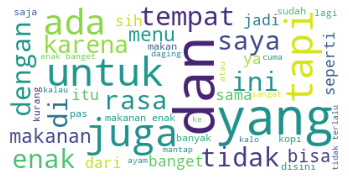

In [ ]:
corpus = " ".join(data['text_preprocessed'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)
img = word_cloud.to_image()

fig = plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.show()

Kita bisa melihat bahwa kata dan masih menjadi kata yang sring muncul dalam text prepocessed

In [ ]:
for i in list(np.random.randint(0,len(data),1)):
    print('Original: ', data.iloc[i,7])
    print('Preprocessed: ', data.iloc[i,8])
    print('-'*50)

Original:  [('Lokasinya tidak jauh dari stasiun tebet, depannya biasa aja disebelah indomaret. Pas masuk memiliki tempat cozy banget ada ikannya gede2 dan masakan Indonesia banget tapi harga tetap terjangkau'); ('Design resto yg uniq, tepatnya di belakang mini market, masuk lewat lorong dan kamu akan menemukan tempat nyaman untuk melepas lapar dan dahaga dengan hidangan berbagai macam olahan ikan dan daging bersama orang orang terdekat kalian...reach it and enjoy the meals'); ('Pelayananny ramah...suasana sdkt dapat...tp memang kerasa bedany saung d jkrta sama saung d luar.jkrta..suasanany lbh berasa. Tuk mknn just get 7 poin from me...sambel goangny nampol bnget..tuk yg lainny B aj..tuk hrga worth it lah'); ('Pesan makanan jam 13.30, makanan baru datang jam 15.00. Pesan bebek goreng ternyata dalemnya masih dingin beku. Pesan lalapan+sambal tapi baru dateng pas kita beres makan padahal kan ga perlu dimasak. Rasa makanan biasa aja.'); ('letaknya di depan seberang starbucks tebet, pintu 

kita bisa melihat bahwa kata yang telah dilakukan text preprocessed menjadi lebih bersih dan ringkas, selanjutnya kita akan melakukan remove Stop word

In [ ]:
# mmebuat Function 
def stemmer_stopped(text):
    stemmer_factory = StemmerFactory()
    stemmer = stemmer_factory.create_stemmer()
    text = stemmer.stem(text)

    list_stopwords = set(stopwords.words('indonesian'))                             
    stopword_factory = StopWordRemoverFactory()                                     
    stopwords_sastrawi = set(stopword_factory.get_stop_words()) 
    list_stopwords = list_stopwords.union(stopwords_sastrawi)                       

    text = " ".join(w if w not in list_stopwords else '' for w in text.split())
    text = re.sub(" +", " ", text.strip())                                          
    return text

def clean_stopword(data):
    data['clean stopword'] = data['text_preprocessed'].apply(stemmer_stopped)
    return data

Melakukan remove stop word

In [ ]:
clean_stopword(data)
data.head()

,Nama Restaurant,Rating,Price,Daerah,Tipe_1,Tipe_2,Tipe_3,Review,text_preprocessed,clean stopword
0,KAKAW Fine Chocolate & Patisserie,3.4,20000,"Senayan, Jakarta",Kafe,Desserts,-,[('Fine Chocolate & Pattiserie ini tempatnya t...,fine chocolate pattiserie ini tempat tidak ter...,fine chocolate pattiserie interior elegan kere...
1,Join Kopi Bulungan,3.9,20000,"Blok M, Jakarta",Kopi,-,-,[('Kopinya enak. Kental dan terasa kopinya. Ad...,kopi enak kental dan terasa kopi ada berbagai ...,kopi kental asa kopi varian jenis kopi minum i...
2,Kopi Coga,4.0,25000,"Bendungan Hilir, Jakarta",Kafe,Kopi,Tea,[('Tempatnya mungil dengan nuansa berwarna bir...,tempat mungil dengan nuansa berwarna biru lucu...,mungil nuansa warna biru lucu nih wifi stop ko...
3,"Mie Keriting Benhil ""Mas Pujo""",3.4,25000,"Bendungan Hilir, Jakarta",Bakmi,-,-,[('mie yamin manis special enak sih lebih enak...,mie yamin manis special enak sih lebih enak ya...,mie yamin manis special sih manis asin si pref...
4,Rocky Rooster,4.2,25000,"Palmerah, Jakarta",Makanan Cepat Saji,-,-,[('Kulitnya Enak Crispy Trs Dagingnya Juicy Bu...,kulit enak crispy terus daging juicy bumbu mer...,kulit crispy daging juicy bumbu resap sambal p...


Kita akan emlihat hasil setelah remove stopword

In [ ]:
for i in range(1):
  print('Before :')
  print(data['Review'][i])
  print('---'*50)
  print('After :')
  print(data['text_preprocessed'][i])
  print('---'*50)
  print('After Clean Stopword :')
  print(data['clean stopword'][i])

Before :
[('Fine Chocolate & Pattiserie ini tempatnya tidak terlalu besar, interior yang terlihat elegan dan keren. Banyak sekali produk coklat yang dijual di sini mulai dari chocolate box, chocolate bar chocolate by the gram, ice cream, hot chocolate powder, minuman chocolate dan cakes dll. Cake di sini didisplay cantik, rasanya kepingin cobain semuanya deh. Ada area bar tersendiri untuk membuat minuman hot chocolate. Seating area terbatas, hanya ada 3 table saja. Tempat yang nyaman untuk menikmati dessert dan hot chocolate. Saya mencoba : *Java Hot 36% (55k++) - Ini adalah salah satu dari minuman single origin chocolate. Perpaduan milk dan cocoanya sangat pas dan ada hint hazelnutnya juga. Creamy, milky dan chocolatenya terasa rich, bitter sweetnya terasa pas dan mewah. Meskipun kadar coklatnya hanya 36% rasa coklatnya sudah terasa sekali. Minuman ini disajikan panas banget. Enak banget dan recommended.
 *Apple granny (55k++) - dessert ini tampil cute dengan bentuk seperti bola yang 

Dari hasil diatas kita lihat bahwa text yang telah dilakukan remove stop word menjadi lebih ringkas dan ini dapat membuat model menjadi lebih baik

Kita akan melihat setelah word cloud setelah dihapus stop wordnya

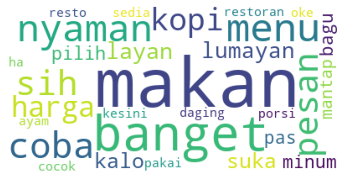

In [ ]:
corpus = " ".join(data['clean stopword'])
word_cloud = WordCloud(max_words=100, background_color='white', min_font_size=10).generate(corpus)
img = word_cloud.to_image()

fig = plt.figure(1)
plt.imshow(img)
plt.axis('off')
plt.show()

Seperti yang bisa kita lihat bahwa setelah dilakukan removing stop word, kata yang sering muncul adalah MAKAN

# **MODELING**

Pada bagian ini kita akan melakukan modeling text word2vec, saya akan 
melakukan perbandingan antara text preprocessed dan clean stopword


In [ ]:
# Display text preproceseed
data['text_preprocessed'][0]

'fine chocolate pattiserie ini tempat tidak terlalu besar interior yang terlihat elegan dan keren banyak sekali produk coklat yang dijual di sini mulai dari chocolate box chocolate bar chocolate by the gram ice cream hot chocolate powder minuman chocolate dan cakes dll cake di sini didisplay cantik rasa pengin mencoba semua deh ada area bar tersendiri untuk membuat minuman hot chocolate seating area terbatas ha ada table saja tempat yang nyaman untuk menikmati dessert dan hot chocolate saya mencoba java hot ke ini adalah salah satu dari minuman single origin chocolate perpaduan milk dan cocoa sangat pas dan ada hint hazelnut juga creamy milky dan chocolate terasa rich bitter sweet terasa pas dan mewah meskipun kadar coklat ha rasa coklat sudah terasa sekali minuman ini disajikan panas banget enak banget dan recommended apple gran ke dessert ini tampil cute dengan bentuk seperti bola yang berwarna warna hijau digarnish cantik dengan edible flower komposisi pistachio biscuit cream cheese

Kita akan membuat variable yang dimana berisi data text preprocessed

In [ ]:
text_reviews = data.text_preprocessed.apply(gensim.utils.simple_preprocess)
text_reviews

0      [fine, chocolate, pattiserie, ini, tempat, tid...
1      [kopi, enak, kental, dan, terasa, kopi, ada, b...
2      [tempat, mungil, dengan, nuansa, berwarna, bir...
3      [mie, yamin, manis, special, enak, sih, lebih,...
4      [kulit, enak, crispy, terus, daging, juicy, bu...
                             ...                        
115    [resto, buffet, dengan, variasi, menu, mediter...
116    [pas, banget, ada, special, occasion, memilih,...
117    [punya, duit, lebih, pengin, makan, enak, deng...
118    [restoran, yang, benar, benar, bonafit, dan, b...
119    [untuk, view, di, sini, ok, ya, sudah, tidak, ...
Name: text_preprocessed, Length: 120, dtype: object

Selanjutnya kita akan membuat variable yang sama untuk clean stopword

In [ ]:
text_reviews_stopped = data['clean stopword'].apply(gensim.utils.simple_preprocess)
text_reviews_stopped

0      [fine, chocolate, pattiserie, interior, elegan...
1      [kopi, kental, asa, kopi, varian, jenis, kopi,...
2      [mungil, nuansa, warna, biru, lucu, nih, wifi,...
3      [mie, yamin, manis, special, sih, manis, asin,...
4      [kulit, crispy, daging, juicy, bumbu, resap, s...
                             ...                        
115    [resto, buffet, variasi, menu, mediterania, ch...
116    [pas, banget, special, occasion, pilih, kesini...
117    [duit, pengin, makan, bahan, bagus, pergi, res...
118    [restoran, bonafit, butuh, rogoh, kantong, men...
119    [view, ok, ragu, makan, restoran, lantai, gedu...
Name: clean stopword, Length: 120, dtype: object

Setelah melakukan pembuatan variable, kita akan melakukan modeling, pada model pertama ini saya akan melakukan pada text preprocessed

## Model 1 (Kolom Text Preprocessed)

In [ ]:
# Model 1
model = Word2Vec(
    window=10,
    min_count=2,
    alpha=0.11,
    seed=10
)

setelah melakukan deklarasi model, selanjutnya kita akan membuat vocabulary terhdap model yang telah kita buat sebelumnya

In [ ]:
model.build_vocab(text_reviews, progress_per=1000)

selanjutnya kita akan melakukan train model 

In [ ]:
model.train(text_reviews, total_examples=model.corpus_count, epochs=model.epochs)

(389241, 501205)

bisa dilihat bahwa sekarang kita mempunyai 389241 baris dan 501205 kolom, selanjutnya kita akan melakukan test untuk melihat kata yang mirip

In [ ]:
# melihat kata yang mirip dengan input nyaman
model.wv.most_similar("nyaman")

[('kencang', 0.8253276944160461),
 ('bersih', 0.7870105504989624),
 ('uasana', 0.7792046070098877),
 ('bersantai', 0.7759014964103699),
 ('wifi', 0.7741808295249939),
 ('milenial', 0.7697960138320923),
 ('bersahabat', 0.7688792943954468),
 ('suasana', 0.7683870196342468),
 ('asik', 0.762578010559082),
 ('nuansa', 0.758955717086792)]

In [ ]:
# melihat kata yang mirip dengan input bersih
model.wv.most_similar("bersih")

[('tara', 0.8065559267997742),
 ('toilet', 0.7526020407676697),
 ('musholla', 0.7516943216323853),
 ('nyaman', 0.747830867767334),
 ('betawi', 0.7321799993515015),
 ('panggil', 0.7260919809341431),
 ('luas', 0.7138822078704834),
 ('standard', 0.7049236297607422),
 ('pulen', 0.7043648958206177),
 ('muas', 0.7042155861854553)]

In [ ]:
# melihat kata yang mirip dengan input makan
model.wv.most_similar("makan")

[('muas', 0.7890970706939697),
 ('kelas', 0.7784923315048218),
 ('angat', 0.7750717401504517),
 ('sahabat', 0.7527090311050415),
 ('rapi', 0.7330254912376404),
 ('menu', 0.6926369667053223),
 ('ubah', 0.6902210712432861),
 ('mahal', 0.6784374713897705),
 ('servis', 0.6766967177391052),
 ('somehow', 0.6657439470291138)]

In [ ]:
# Melihat nilai kemiripan antara 2 kata 
model.wv.similarity(w1="makan", w2="rokok")

-0.09020986

Setelah kita melakukan pengecekan:
* terdapat kata kencang yang mempunyai nilai kemiripan tinggi terhadap kata nyaman
* terdapat kata yang terpotong yaitu uasana ini dapat membuat model menjadi kurang baik
* kita dapat melihat nilai kemiripan makan dan rokok mempunyai nilai kemiripan yang kecil yaitu -0.09 yang artinya 2 kata ini hampir tidak mempunyai kemiripan

## Model 2 (Kolom Clean Stopword)

Kita akan membuat model kedua yaitu menggunakan vobulary berdasarkan kolom Clean Stopword

In [ ]:
# Model 2
model_2 = Word2Vec(
    window=10,
    min_count=2,
    alpha=0.15,
    seed=10
)

Selanjutnya membuat vocabulary untuk model 2

In [ ]:
model_2.build_vocab(text_reviews_stopped, progress_per=1000)

Melakukan train terhadap model 2

In [ ]:
model_2.train(text_reviews_stopped, total_examples=model_2.corpus_count, epochs=model_2.epochs)

(242047, 294075)

Setelah melakukan train kita akan melakukan pengecekan model untuk melihat kemiripan kata

In [ ]:
# Melihat kemiripan kata dengan input nyaman
model_2.wv.most_similar("nyaman")

[('uasana', 0.8356294631958008),
 ('musholla', 0.8024208545684814),
 ('adem', 0.8016148805618286),
 ('cocktail', 0.7963314652442932),
 ('mushola', 0.7810099124908447),
 ('playground', 0.7726098299026489),
 ('standart', 0.7695059180259705),
 ('tenang', 0.7495336532592773),
 ('bersih', 0.7478308081626892),
 ('homey', 0.744676947593689)]

In [ ]:
# Melihat kemiripan kata dengan input bersih
model_2.wv.most_similar("bersih")

[('tara', 0.8065559267997742),
 ('toilet', 0.7526020407676697),
 ('musholla', 0.7516943216323853),
 ('nyaman', 0.747830867767334),
 ('betawi', 0.7321799993515015),
 ('panggil', 0.7260919809341431),
 ('luas', 0.7138822078704834),
 ('standard', 0.7049236297607422),
 ('pulen', 0.7043648958206177),
 ('muas', 0.7042155861854553)]

In [ ]:
# Melihat kemiripan kata dengan input makan
model_2.wv.most_similar("makan")

[('muas', 0.7890970706939697),
 ('kelas', 0.7784923315048218),
 ('angat', 0.7750717401504517),
 ('sahabat', 0.7527090311050415),
 ('rapi', 0.7330254912376404),
 ('menu', 0.6926369667053223),
 ('ubah', 0.6902210712432861),
 ('mahal', 0.6784374713897705),
 ('servis', 0.6766967177391052),
 ('somehow', 0.6657439470291138)]

In [ ]:
model_2.wv.similarity(w1="makan", w2="rokok")

-0.09020986

Setelah melakukan pengecekan :
* Kita bisa melihat bahwa saat menggunakan kata nyaman yang muncul dengan nilai kemiripan tertinggi adalah kata uasana.
* Setelah melakukan input dnegan kata bersih kita bisa melihat bahwa kata `tara` mempunyai nilai kemiripan tertinggi dengan kata bersih
* kita bisa melihat bahwa makan dan rokok mempunyai nilai yang kecil

In [ ]:
# Function Uji Coba
def testing_similar(text):
  res_1 = model.most_similar(text)
  res_2 = model_2.most_similar(text)
  print('Hasil Model 1 :',res_1)
  print('Hasil Model 2 :',res_2)

In [ ]:
testing_similar("makan")

Hasil Model 1 : [('muas', 0.7890970706939697), ('kelas', 0.7784923315048218), ('angat', 0.7750717401504517), ('sahabat', 0.7527090311050415), ('rapi', 0.7330254912376404), ('menu', 0.6926369667053223), ('ubah', 0.6902210712432861), ('mahal', 0.6784374713897705), ('servis', 0.6766967177391052), ('somehow', 0.6657439470291138)]
Hasil Model 2 : [('muas', 0.7890970706939697), ('kelas', 0.7784923315048218), ('angat', 0.7750717401504517), ('sahabat', 0.7527090311050415), ('rapi', 0.7330254912376404), ('menu', 0.6926369667053223), ('ubah', 0.6902210712432861), ('mahal', 0.6784374713897705), ('servis', 0.6766967177391052), ('somehow', 0.6657439470291138)]


**Evaluation**

Berdsarkan hasil dari uji coba :      
* Nilai similar atau kemiripan setiap kata di Model 1, terbilang kecil jika kita bandingkan dengan Model 2
* Kata yang menjadi kemiripan juga 
* Berdasarkan hasi diatas saya akan menggunakanModel 2 untuk Project ini

# **MODEL SIMULATION**

Kita akan melakukan simulasi model untuk percobaan sebelum melakukan deployment ke frontend, simulasi ini bertujuan untuk mempermudah pembuatan interface terhadapa pembutan frontend.

Kita akan membuat function terlebih dahulu, function ini bertujuan untuk melakukan input text terhadap customer.

In [ ]:
def input_text(text1, text2, text3):
  list_new =[]
  count_word_1 = []
  count_word_2 = []
  count_word_3 = []
  count_word_4 = []
  count_word_5 = []
  count_word_6 = []
  count_word_7 = []
  count_word_8 = []
  count_word_9 = []
  count_word_10 = []
  count_word_11 = []
  count_word_12 = []
  count_word_13 = []
  count_word_14 = []
  count_word_15 = []

  try:
    # Jika bisa semuanya
    res_1 = model_2.most_similar(text1)[0:5]   
    res_2 = model_2.most_similar(text2)[0:5]
    res_3 = model_2.most_similar(text3)[0:5]
    df_res_1 = pd.DataFrame(res_1)
    df_res_2 = pd.DataFrame(res_2)
    df_res_3 = pd.DataFrame(res_3)
    df_result_1 = pd.concat([df_res_1, df_res_2, df_res_3], axis=0).reset_index(drop=True)
    for item in df_result_1[0].unique():
      list_new.append(item)
    for i in range(len(data)):
      count_word_1.append(data['clean stopword'][i].count(list_new[0]))
      count_word_2.append(data['clean stopword'][i].count(list_new[1]))
      count_word_3.append(data['clean stopword'][i].count(list_new[2]))
      count_word_4.append(data['clean stopword'][i].count(list_new[3]))
      count_word_5.append(data['clean stopword'][i].count(list_new[4]))
      count_word_6.append(data['clean stopword'][i].count(list_new[5]))
      count_word_7.append(data['clean stopword'][i].count(list_new[6]))
      count_word_8.append(data['clean stopword'][i].count(list_new[7]))
      count_word_9.append(data['clean stopword'][i].count(list_new[8]))
      count_word_10.append(data['clean stopword'][i].count(list_new[9]))
      count_word_11.append(data['clean stopword'][i].count(list_new[10]))
      count_word_12.append(data['clean stopword'][i].count(list_new[11]))
      count_word_13.append(data['clean stopword'][i].count(list_new[12]))
      count_word_14.append(data['clean stopword'][i].count(list_new[13]))
      count_word_15.append(data['clean stopword'][i].count(list_new[14]))
    data['count_word_1'] = count_word_1
    data['count_word_2'] = count_word_2
    data['count_word_3'] = count_word_3
    data['count_word_4'] = count_word_4
    data['count_word_5'] = count_word_5
    data['count_word_6'] = count_word_6
    data['count_word_7'] = count_word_7
    data['count_word_8'] = count_word_8
    data['count_word_9'] = count_word_9
    data['count_word_10'] = count_word_10
    data['count_word_11'] = count_word_11
    data['count_word_12'] = count_word_12
    data['count_word_13'] = count_word_13
    data['count_word_14'] = count_word_14
    data['count_word_15'] = count_word_15
    data['sum_count_word'] = data.iloc[:,11:25].sum(axis=1)
    data_1 = data[data.sum_count_word != 0]
    data_1 = data_1.sort_values("sum_count_word", ascending=False)[['Nama Restaurant','Tipe_1', 'Rating', 'Price', 'Daerah', 'sum_count_word']]
    return data_1

  except:
    try:
      # Hanya res 2 dan res 3
      res_2 = model_2.most_similar(text2)[0:5]
      res_3 = model_2.most_similar(text3)[0:5]
      df_res_2 = pd.DataFrame(res_2)
      df_res_3 = pd.DataFrame(res_3)
      df_result_2 = pd.concat([df_res_2, df_res_3], axis=0).reset_index(drop=True)
      for item in df_result_2[0].unique():
        list_new.append(item)
      for i in range(len(data)):
        count_word_1.append(data['clean stopword'][i].count(list_new[0]))
        count_word_2.append(data['clean stopword'][i].count(list_new[1]))
        count_word_3.append(data['clean stopword'][i].count(list_new[2]))
        count_word_4.append(data['clean stopword'][i].count(list_new[3]))
        count_word_5.append(data['clean stopword'][i].count(list_new[4]))
        count_word_6.append(data['clean stopword'][i].count(list_new[5]))
        count_word_7.append(data['clean stopword'][i].count(list_new[6]))
        count_word_8.append(data['clean stopword'][i].count(list_new[7]))
        count_word_9.append(data['clean stopword'][i].count(list_new[8]))
        count_word_10.append(data['clean stopword'][i].count(list_new[9]))
      data['count_word_1'] = count_word_1
      data['count_word_2'] = count_word_2
      data['count_word_3'] = count_word_3
      data['count_word_4'] = count_word_4
      data['count_word_5'] = count_word_5
      data['count_word_6'] = count_word_6
      data['count_word_7'] = count_word_7
      data['count_word_8'] = count_word_8
      data['count_word_9'] = count_word_9
      data['count_word_10'] = count_word_10
      data['sum_count_word'] = data.iloc[:,11:20].sum(axis=1)
      data_2 = data[data.sum_count_word != 0]
      data_2 = data_2.sort_values("sum_count_word", ascending=False)[['Nama Restaurant','Tipe_1', 'Rating', 'Price', 'Daerah', 'sum_count_word']]
      return data_2

    except:
      try:
        # Hanya res 3 
        res_3 = model_2.most_similar(text3)[0:5]
        df_result_3 = pd.DataFrame(res_3).reset_index(drop=True)
        for item in df_result_3[0].unique():
          list_new.append(item)
        for i in range(len(data)):
          count_word_1.append(data['clean stopword'][i].count(list_new[0]))
          count_word_2.append(data['clean stopword'][i].count(list_new[1]))
          count_word_3.append(data['clean stopword'][i].count(list_new[2]))
          count_word_4.append(data['clean stopword'][i].count(list_new[3]))
          count_word_5.append(data['clean stopword'][i].count(list_new[4]))
        data['count_word_1'] = count_word_1
        data['count_word_2'] = count_word_2
        data['count_word_3'] = count_word_3
        data['count_word_4'] = count_word_4
        data['count_word_5'] = count_word_5
        data['sum_count_word'] = data.iloc[:,11:15].sum(axis=1)
        data_3 = data[data.sum_count_word != 0]
        data_3 = data_3.sort_values("sum_count_word", ascending=False)[['Nama Restaurant','Tipe_1', 'Rating', 'Price', 'Daerah', 'sum_count_word']]
        return data_3

      except :
        try:
          # Hanya res 1 dan res 2
          res_1 = model_2.most_similar(text1)[0:5]
          res_2 = model_2.most_similar(text2)[0:5]
          df_res_1 = pd.DataFrame(res_1)
          df_res_2 = pd.DataFrame(res_2)
          df_result_4 = pd.concat([df_res_1, df_res_2], axis=0).reset_index(drop=True)
          for item in df_result_4[0].unique():
            list_new.append(item)
          for i in range(len(data)):
            count_word_1.append(data['clean stopword'][i].count(list_new[0]))
            count_word_2.append(data['clean stopword'][i].count(list_new[1]))
            count_word_3.append(data['clean stopword'][i].count(list_new[2]))
            count_word_4.append(data['clean stopword'][i].count(list_new[3]))
            count_word_5.append(data['clean stopword'][i].count(list_new[4]))
            count_word_6.append(data['clean stopword'][i].count(list_new[5]))
            count_word_7.append(data['clean stopword'][i].count(list_new[6]))
            count_word_8.append(data['clean stopword'][i].count(list_new[7]))
            count_word_9.append(data['clean stopword'][i].count(list_new[8]))
            count_word_10.append(data['clean stopword'][i].count(list_new[9]))
          data['count_word_1'] = count_word_1
          data['count_word_2'] = count_word_2
          data['count_word_3'] = count_word_3
          data['count_word_4'] = count_word_4
          data['count_word_5'] = count_word_5
          data['count_word_6'] = count_word_6
          data['count_word_7'] = count_word_7
          data['count_word_8'] = count_word_8
          data['count_word_9'] = count_word_9
          data['count_word_10'] = count_word_10
          data['sum_count_word'] = data.iloc[:,11:20].sum(axis=1)
          data_4 = data[data.sum_count_word != 0]
          data_4 = data_4.sort_values("sum_count_word", ascending=False)[['Nama Restaurant','Tipe_1', 'Rating', 'Price', 'Daerah', 'sum_count_word']]
          return data_4

        except:
          try:
            # Hanya res 2 
            res_2 = model_2.most_similar(text2)[0:5]
            df_res_2 = pd.DataFrame(res_2)
            df_result_5 = df_res_2.reset_index(drop=True)
            for item in df_result_5[0].unique():
              list_new.append(item)
            for i in range(len(data)):
              count_word_1.append(data['clean stopword'][i].count(list_new[0]))
              count_word_2.append(data['clean stopword'][i].count(list_new[1]))
              count_word_3.append(data['clean stopword'][i].count(list_new[2]))
              count_word_4.append(data['clean stopword'][i].count(list_new[3]))
              count_word_5.append(data['clean stopword'][i].count(list_new[4]))
            data['count_word_1'] = count_word_1
            data['count_word_2'] = count_word_2
            data['count_word_3'] = count_word_3
            data['count_word_4'] = count_word_4
            data['count_word_5'] = count_word_5
            data['sum_count_word'] = data.iloc[:,11:15].sum(axis=1)
            data_5 = data[data.sum_count_word != 0]
            data_5 = data_5.sort_values("sum_count_word", ascending=False)[['Nama Restaurant','Tipe_1', 'Rating', 'Price', 'Daerah', 'sum_count_word']]
            return data_5

          except:
            try:
              # Hanya res 1
              res_1 = model_2.most_similar(text1)[0:5]
              df_res_1 = pd.DataFrame(res_1)
              df_result_6 = df_res_1.reset_index(drop=True)
              for item in df_result_6[0].unique():
                list_new.append(item)
              for i in range(len(data)):
                count_word_1.append(data['clean stopword'][i].count(list_new[0]))
                count_word_2.append(data['clean stopword'][i].count(list_new[1]))
                count_word_3.append(data['clean stopword'][i].count(list_new[2]))
                count_word_4.append(data['clean stopword'][i].count(list_new[3]))
                count_word_5.append(data['clean stopword'][i].count(list_new[4]))
              data['count_word_1'] = count_word_1
              data['count_word_2'] = count_word_2
              data['count_word_3'] = count_word_3
              data['count_word_4'] = count_word_4
              data['count_word_5'] = count_word_5
              data['sum_count_word'] = data.iloc[:,11:15].sum(axis=1)
              data_6 = data[data.sum_count_word != 0]
              data_6 = data_6.sort_values("sum_count_word", ascending=False)[['Nama Restaurant','Tipe_1', 'Rating', 'Price', 'Daerah', 'sum_count_word']]
              return data_6

            except:
              print("Maaf Keyword Tidak ditemukan")

Setelah melakukan pembuatan function, kita akan melakukan uji coba untuk melihat bagaimana function dan modek ini bekerja.

Memasukan 3 input benar

In [ ]:
hasil_1 = input_text("nyaman", "cozy", "makan")
hasil_1.head()

,Nama Restaurant,Tipe_1,Rating,Price,Daerah,sum_count_word
77,Beer Garden,Itali,4.1,150000,"SCBD, Jakarta",22
88,Kokonut & Curtains,Kafe,4.3,175000,"Senayan, Jakarta",21
29,Warung Fotkop,Kafe,3.9,40000,"Fatmawati, Jakarta",19
82,Brew & Co,Indonesia,3.5,150000,"Cilandak Town Square, Fatmawati, Jakarta",15
43,Bunna Coffee,Kopi,3.7,50000,"Senopati, Jakarta",15


Hanya input 2 dan 3 yang benar

In [ ]:
hasil_2 = input_text("nydsvavds", "cozy", "makan")
hasil_2.head()

,Nama Restaurant,Tipe_1,Rating,Price,Daerah,sum_count_word
77,Beer Garden,Itali,4.1,150000,"SCBD, Jakarta",36
88,Kokonut & Curtains,Kafe,4.3,175000,"Senayan, Jakarta",29
29,Warung Fotkop,Kafe,3.9,40000,"Fatmawati, Jakarta",23
119,Henshin - The Westin Jakarta,Peruvian,4.2,700000,"The Westin Jakarta, Kuningan, Jakarta",22
43,Bunna Coffee,Kopi,3.7,50000,"Senopati, Jakarta",21


Hanya input 3 yang benar

In [ ]:
hasil_3 = input_text("nydsvavds", "dsvdsv", "makan")
hasil_3.head()

,Nama Restaurant,Tipe_1,Rating,Price,Daerah,sum_count_word
4,Rocky Rooster,Makanan Cepat Saji,4.2,25000,"Palmerah, Jakarta",5
80,Tesate,Satay,4.1,150000,"Plaza Senayan, Senayan, Jakarta",4
94,Shabu-Shabu Shaburi,Jepang,4.1,300000,"Senayan City, Senayan, Jakarta",4
71,2madison Eatery,Barat,4.1,125000,"Kemang, Jakarta",4
89,Sushi Sei,Jepang,4.5,175000,"Plaza Senayan, Senayan, Jakarta",4


Hanya input 1 yang benar

In [ ]:
hasil_4 = input_text("nyaman", "dsvdsv", "asddsa")
hasil_4.head()

,Nama Restaurant,Tipe_1,Rating,Price,Daerah,sum_count_word
88,Kokonut & Curtains,Kafe,4.3,175000,"Senayan, Jakarta",6
47,Bukan Ruang,Kopi,4.2,75000,"Kemang, Jakarta",4
82,Brew & Co,Indonesia,3.5,150000,"Cilandak Town Square, Fatmawati, Jakarta",4
57,Toodz House,Kopi,3.7,100000,"Lebak Bulus, Jakarta",4
29,Warung Fotkop,Kafe,3.9,40000,"Fatmawati, Jakarta",4


Hanya input 2 yang benar

In [ ]:
hasil_5 = input_text("nasdfsfa", "nyaman", "asddsa")
hasil_5.head()

,Nama Restaurant,Tipe_1,Rating,Price,Daerah,sum_count_word
88,Kokonut & Curtains,Kafe,4.3,175000,"Senayan, Jakarta",6
47,Bukan Ruang,Kopi,4.2,75000,"Kemang, Jakarta",4
82,Brew & Co,Indonesia,3.5,150000,"Cilandak Town Square, Fatmawati, Jakarta",4
57,Toodz House,Kopi,3.7,100000,"Lebak Bulus, Jakarta",4
29,Warung Fotkop,Kafe,3.9,40000,"Fatmawati, Jakarta",4


Tidak ada input yang benar

In [ ]:
hasil_6 = input_text("nasdfsfa", "dsvvdsvvds", "asddsa")
hasil_6

Maaf Keyword Tidak ditemukan


Dari hasil uji coba diatas :       
* Function dan model sudah berjalan dnegan baik

Selanjutnya kita akan membuat function untuk filtering hasil dari input text, kita akan membuat function filtering terlebih dahulu

In [ ]:
def input_user(harga, daerah, tipe):
    data_1 = hasil_1[hasil_1.Price <= harga ]
    data_1 = data_1[data_1.Daerah == daerah ]
    data_1 = data_1[data_1.Tipe_1 == tipe ]
    return data_1

In [ ]:
input_user(100000, "Fatmawati, Jakarta", "Jawa")

,Nama Restaurant,Tipe_1,Rating,Price,Daerah,sum_count_word
19,Kedai Halaman,Jawa,3.6,35000,"Fatmawati, Jakarta",2


Kita bisa melihat bahwa function yang kita buat berjalan dengan baik

# **SAVING MODEL**

Kita akan melakukan save model

In [ ]:
model_2.save("model_2.model")

# **MODEL INFERENCE**

Load model

In [ ]:
model = gensim.models.Word2Vec.load("model_2.model")

In [ ]:
model.most_similar("mantap")

[('mantul', 0.8882601261138916),
 ('mantab', 0.8168669939041138),
 ('lidah', 0.8131980895996094),
 ('banget', 0.7676073312759399),
 ('pokok', 0.7665108442306519),
 ('top', 0.7402812838554382),
 ('jiwa', 0.7358113527297974),
 ('super', 0.7139198780059814),
 ('enakk', 0.7128123044967651),
 ('juara', 0.6950969696044922)]

Kita akan menggunakan model yang baru saja di load, selnajutnya kita akan deklarasi model menggunakan function

In [ ]:
def input_text_load(text1, text2, text3):
  list_new =[]
  columns_new= []
  count_word_1 = []
  count_word_2 = []
  count_word_3 = []
  count_word_4 = []
  count_word_5 = []
  count_word_6 = []
  count_word_7 = []
  count_word_8 = []
  count_word_9 = []
  count_word_10 = []
  count_word_11 = []
  count_word_12 = []
  count_word_13 = []
  count_word_14 = []
  count_word_15 = []

  try:
    # Jika bisa semuanya
    res_1 = model.most_similar(text1)[0:5]   
    res_2 = model.most_similar(text2)[0:5]
    res_3 = model.most_similar(text3)[0:5]
    df_res_1 = pd.DataFrame(res_1)
    df_res_2 = pd.DataFrame(res_2)
    df_res_3 = pd.DataFrame(res_3)
    df_result_1 = pd.concat([df_res_1, df_res_2, df_res_3], axis=0).reset_index(drop=True)
    for item in df_result_1[0].unique():
      list_new.append(item)
    for i in range(len(data)):
      count_word_1.append(data['clean stopword'][i].count(list_new[0]))
      count_word_2.append(data['clean stopword'][i].count(list_new[1]))
      count_word_3.append(data['clean stopword'][i].count(list_new[2]))
      count_word_4.append(data['clean stopword'][i].count(list_new[3]))
      count_word_5.append(data['clean stopword'][i].count(list_new[4]))
      count_word_6.append(data['clean stopword'][i].count(list_new[5]))
      count_word_7.append(data['clean stopword'][i].count(list_new[6]))
      count_word_8.append(data['clean stopword'][i].count(list_new[7]))
      count_word_9.append(data['clean stopword'][i].count(list_new[8]))
      count_word_10.append(data['clean stopword'][i].count(list_new[9]))
      count_word_11.append(data['clean stopword'][i].count(list_new[10]))
      count_word_12.append(data['clean stopword'][i].count(list_new[11]))
      count_word_13.append(data['clean stopword'][i].count(list_new[12]))
      count_word_14.append(data['clean stopword'][i].count(list_new[13]))
      count_word_15.append(data['clean stopword'][i].count(list_new[14]))
    data['count_word_1'] = count_word_1
    data['count_word_2'] = count_word_2
    data['count_word_3'] = count_word_3
    data['count_word_4'] = count_word_4
    data['count_word_5'] = count_word_5
    data['count_word_6'] = count_word_6
    data['count_word_7'] = count_word_7
    data['count_word_8'] = count_word_8
    data['count_word_9'] = count_word_9
    data['count_word_10'] = count_word_10
    data['count_word_11'] = count_word_11
    data['count_word_12'] = count_word_12
    data['count_word_13'] = count_word_13
    data['count_word_14'] = count_word_14
    data['count_word_15'] = count_word_15
    data['sum_count_word'] = data.iloc[:,11:25].sum(axis=1)
    data_1 = data[data.sum_count_word != 0]
    data_1 = data_1.sort_values("sum_count_word", ascending=False)[['Nama Restaurant','Tipe_1', 'Rating', 'Price', 'Daerah', 'sum_count_word']]
    return data_1

  except:
    try:
      # Hanya 2 dan 3
      res_2 = model.most_similar(text2)[0:5]
      res_3 = model.most_similar(text3)[0:5]
      df_res_2 = pd.DataFrame(res_2)
      df_res_3 = pd.DataFrame(res_3)
      df_result_2 = pd.concat([df_res_2, df_res_3], axis=0).reset_index(drop=True)
      for item in df_result_2[0].unique():
        list_new.append(item)
      for i in range(len(data)):
        count_word_1.append(data['clean stopword'][i].count(list_new[0]))
        count_word_2.append(data['clean stopword'][i].count(list_new[1]))
        count_word_3.append(data['clean stopword'][i].count(list_new[2]))
        count_word_4.append(data['clean stopword'][i].count(list_new[3]))
        count_word_5.append(data['clean stopword'][i].count(list_new[4]))
        count_word_6.append(data['clean stopword'][i].count(list_new[5]))
        count_word_7.append(data['clean stopword'][i].count(list_new[6]))
        count_word_8.append(data['clean stopword'][i].count(list_new[7]))
        count_word_9.append(data['clean stopword'][i].count(list_new[8]))
        count_word_10.append(data['clean stopword'][i].count(list_new[9]))
      data['count_word_1'] = count_word_1
      data['count_word_2'] = count_word_2
      data['count_word_3'] = count_word_3
      data['count_word_4'] = count_word_4
      data['count_word_5'] = count_word_5
      data['count_word_6'] = count_word_6
      data['count_word_7'] = count_word_7
      data['count_word_8'] = count_word_8
      data['count_word_9'] = count_word_9
      data['count_word_10'] = count_word_10
      data['sum_count_word'] = data.iloc[:,11:20].sum(axis=1)
      data_2 = data[data.sum_count_word != 0]
      data_2 = data_2.sort_values("sum_count_word", ascending=False)[['Nama Restaurant','Tipe_1', 'Rating', 'Price', 'Daerah', 'sum_count_word']]
      return data_2

    except:
      try:
        # Hanya 3 
        res_3 = model.most_similar(text3)[0:5]
        df_result_3 = pd.DataFrame(res_3).reset_index(drop=True)
        for item in df_result_3[0].unique():
          list_new.append(item)
        for i in range(len(data)):
          count_word_1.append(data['clean stopword'][i].count(list_new[0]))
          count_word_2.append(data['clean stopword'][i].count(list_new[1]))
          count_word_3.append(data['clean stopword'][i].count(list_new[2]))
          count_word_4.append(data['clean stopword'][i].count(list_new[3]))
          count_word_5.append(data['clean stopword'][i].count(list_new[4]))
        data['count_word_1'] = count_word_1
        data['count_word_2'] = count_word_2
        data['count_word_3'] = count_word_3
        data['count_word_4'] = count_word_4
        data['count_word_5'] = count_word_5
        data['sum_count_word'] = data.iloc[:,11:15].sum(axis=1)
        data_3 = data[data.sum_count_word != 0]
        data_3 = data_3.sort_values("sum_count_word", ascending=False)[['Nama Restaurant','Tipe_1', 'Rating', 'Price', 'Daerah', 'sum_count_word']]
        return data_3

      except :
        try:
          # Hanya 1 dan 2
          res_1 = model.most_similar(text1)[0:5]
          res_2 = model.most_similar(text2)[0:5]
          df_res_1 = pd.DataFrame(res_1)
          df_res_2 = pd.DataFrame(res_2)
          df_result_4 = pd.concat([df_res_1, df_res_2], axis=0).reset_index(drop=True)
          for item in df_result_4[0].unique():
            list_new.append(item)
          for i in range(len(data)):
            count_word_1.append(data['clean stopword'][i].count(list_new[0]))
            count_word_2.append(data['clean stopword'][i].count(list_new[1]))
            count_word_3.append(data['clean stopword'][i].count(list_new[2]))
            count_word_4.append(data['clean stopword'][i].count(list_new[3]))
            count_word_5.append(data['clean stopword'][i].count(list_new[4]))
            count_word_6.append(data['clean stopword'][i].count(list_new[5]))
            count_word_7.append(data['clean stopword'][i].count(list_new[6]))
            count_word_8.append(data['clean stopword'][i].count(list_new[7]))
            count_word_9.append(data['clean stopword'][i].count(list_new[8]))
            count_word_10.append(data['clean stopword'][i].count(list_new[9]))
          data['count_word_1'] = count_word_1
          data['count_word_2'] = count_word_2
          data['count_word_3'] = count_word_3
          data['count_word_4'] = count_word_4
          data['count_word_5'] = count_word_5
          data['count_word_6'] = count_word_6
          data['count_word_7'] = count_word_7
          data['count_word_8'] = count_word_8
          data['count_word_9'] = count_word_9
          data['count_word_10'] = count_word_10
          data['sum_count_word'] = data.iloc[:,11:20].sum(axis=1)
          data_4 = data[data.sum_count_word != 0]
          data_4 = data_4.sort_values("sum_count_word", ascending=False)[['Nama Restaurant','Tipe_1', 'Rating', 'Price', 'Daerah', 'sum_count_word']]
          return data_4

        except:
          try:
            # Hanya res 2 
            res_2 = model.most_similar(text2)[0:5]
            df_res_2 = pd.DataFrame(res_2)
            df_result_5 = df_res_2.reset_index(drop=True)
            for item in df_result_5[0].unique():
              list_new.append(item)
            for i in range(len(data)):
              count_word_1.append(data['clean stopword'][i].count(list_new[0]))
              count_word_2.append(data['clean stopword'][i].count(list_new[1]))
              count_word_3.append(data['clean stopword'][i].count(list_new[2]))
              count_word_4.append(data['clean stopword'][i].count(list_new[3]))
              count_word_5.append(data['clean stopword'][i].count(list_new[4]))
            data['count_word_1'] = count_word_1
            data['count_word_2'] = count_word_2
            data['count_word_3'] = count_word_3
            data['count_word_4'] = count_word_4
            data['count_word_5'] = count_word_5
            data['sum_count_word'] = data.iloc[:,11:15].sum(axis=1)
            data_5 = data[data.sum_count_word != 0]
            data_5 = data_5.sort_values("sum_count_word", ascending=False)[['Nama Restaurant','Tipe_1', 'Rating', 'Price', 'Daerah', 'sum_count_word']]
            return data_5

          except:
            try:
              # Hanya 1
              res_1 = model.most_similar(text1)[0:5]
              df_res_1 = pd.DataFrame(res_1)
              df_result_6 = df_res_1.reset_index(drop=True)
              for item in df_result_6[0].unique():
                list_new.append(item)
              for i in range(len(data)):
                count_word_1.append(data['clean stopword'][i].count(list_new[0]))
                count_word_2.append(data['clean stopword'][i].count(list_new[1]))
                count_word_3.append(data['clean stopword'][i].count(list_new[2]))
                count_word_4.append(data['clean stopword'][i].count(list_new[3]))
                count_word_5.append(data['clean stopword'][i].count(list_new[4]))
              data['count_word_1'] = count_word_1
              data['count_word_2'] = count_word_2
              data['count_word_3'] = count_word_3
              data['count_word_4'] = count_word_4
              data['count_word_5'] = count_word_5
              data['sum_count_word'] = data.iloc[:,11:15].sum(axis=1)
              data_6 = data[data.sum_count_word != 0]
              data_6 = data_6.sort_values("sum_count_word", ascending=False)[['Nama Restaurant','Tipe_1', 'Rating', 'Price', 'Daerah', 'sum_count_word']]
              return data_6

            except:
              print("Maaf Keyword Tidak ditemukan")

Setelah kita melakukan deklarasi function buat model, selanjutnya kita akan test model yang baru saja di load

In [ ]:
teks = input_text_load("nyaman", "cozy", "rokok")
teks

,Nama Restaurant,Tipe_1,Rating,Price,Daerah,sum_count_word
29,Warung Fotkop,Kafe,3.9,40000,"Fatmawati, Jakarta",23
88,Kokonut & Curtains,Kafe,4.3,175000,"Senayan, Jakarta",23
1,Join Kopi Bulungan,Kopi,3.9,20000,"Blok M, Jakarta",22
77,Beer Garden,Itali,4.1,150000,"SCBD, Jakarta",20
82,Brew & Co,Indonesia,3.5,150000,"Cilandak Town Square, Fatmawati, Jakarta",17
...,...,...,...,...,...,...
78,Hoshino Coffee,Kafe,3.9,150000,"Senayan City, Senayan, Jakarta",1
4,Rocky Rooster,Makanan Cepat Saji,4.2,25000,"Palmerah, Jakarta",1
89,Sushi Sei,Jepang,4.5,175000,"Plaza Senayan, Senayan, Jakarta",1
6,Ayam Blenger PSP,Indonesia,4.2,25000,"Palmerah, Jakarta",1


Kita bisa melihat bahwa model dapat melakukan prediksi 

In [ ]:
def input_user_load(harga, daerah, tipe):
    model_load = teks[teks.Price <= harga ]
    model_load = model_load[model_load.Daerah == daerah ]
    model_load = model_load[model_load.Tipe_1 == tipe ]
    return model_load

In [ ]:
input_user_load(100000, "Indonesian, Kuningan, Jakarta", "Peruvian")

,Nama Restaurant,Tipe_1,Rating,Price,Daerah,sum_count_word


Kita bisa melihat bahwa model yang kita buat telah berhasil melakukan rekomendasi terhadap user baru.

Refrences :      
https://github.com/rafifaditio/Product_Review_Text_Summarization/blob/main/Product%20Review%20Summarization.ipynb